<a href="https://colab.research.google.com/github/victorma969/Wine-Classifier-pipelines/blob/main/WineQuality_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Extraction & Library Import**




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from time import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/3 período /winequality.csv')

df.head(10)



,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
5,5,7.1,0.26,0.32,5.9,0.037,39.0,97.0,0.99340,3.31,0.40,11.6,6,0
6,6,7.3,0.22,0.49,9.9,0.031,48.0,161.0,0.99370,3.01,0.28,11.2,6,0
7,7,7.3,0.32,0.34,6.6,0.032,24.0,112.0,0.99505,3.22,0.46,9.8,6,0
8,8,8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,7,1
9,9,6.7,0.75,0.01,2.4,0.078,17.0,32.0,0.99550,3.55,0.61,12.8,6,1


In [2]:
#Verifica as medidas descritivas do dataset
display(df.describe().transpose())
display(df.info())
display(df.quality.unique())

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6497.0,3248.000000,1875.666681,0.00000,1624.00000,3248.00000,4872.00000,6496.00000
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  wine_is_red           6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


None

array([6, 7, 5, 4, 8, 3, 9])

0    4898
1    1599
Name: wine_is_red, dtype: int64

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

,qualidade,tinto ou branco
0,4,Tinto
1,4,Tinto
2,4,Branco
3,4,Branco
4,4,Branco


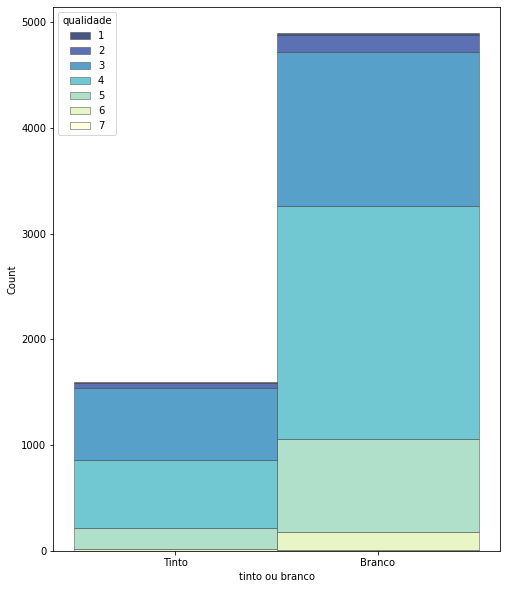

In [3]:
#Verifica se o dataset está desbalanceado
display(df.wine_is_red.value_counts())
display(df.quality.value_counts())

x = df.iloc[:,12:14].values
x = pd.DataFrame(x)
x.columns = ['qualidade', 'tinto ou branco']

#transforma "wine_is_red" em variável categórica para plotagem dos dados
x['tinto ou branco'] = x['tinto ou branco'].map({0:'Branco', 1:'Tinto'}, na_action=None)

#reduz a escala de medida da qualidade
x['qualidade'] = x['qualidade'] - 2

display(x.head())

#visualização do dado
plt.figure(figsize=(8, 10))
fig_x = sns.histplot(
                      x,
                      x="tinto ou branco", hue="qualidade",
                      multiple="stack",
                      palette="YlGnBu_r",
                      edgecolor=".3",
                      linewidth=.5,
                      hue_order = "qualidade",
                      legend = True,
                  )

**Data Cleaning**





In [4]:
#Excluí a coluna Unnamed: 0
df.drop(['Unnamed: 0'],axis = 1,inplace = True)

#Dataset com os targets 
df_targets = df.iloc[:,12:14].values
df_targets = pd.DataFrame(x)
df_targets.columns = ["quality", "wine_is_red"]

In [5]:
#Separa em dois datasets os targets 
df_features = df.drop(columns= ['wine_is_red'])
df_features_red = df.drop(columns= ['quality'])

# Normaliza os valores 
scaler = StandardScaler()
scaler1 = StandardScaler()

scaler.fit(df_features)
scaler1.fit(df_features_red)

df_features_norm = scaler.transform(df_features)
df_features_red_norm = scaler1.transform(df_features_red)


df_features_norm = pd.DataFrame(df_features_norm)
df_features_red_norm = pd.DataFrame(df_features_red_norm)


df_features_norm.columns = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol",	"quality"]
df_features_red_norm.columns = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol",	"wine_is_red"]


In [6]:
df_corr = df_features_norm.corr()
df_red_corr = df_features_red_norm.corr()
display(df_corr)
display(df_red_corr)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_is_red
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218


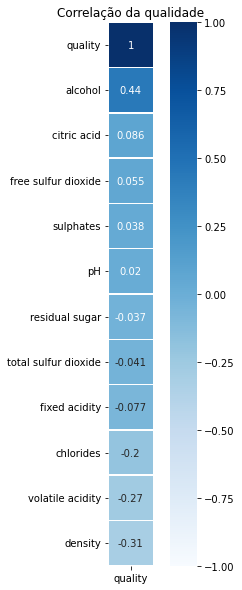

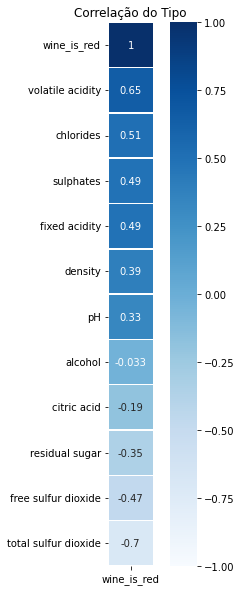

In [ ]:

plt.figure(figsize=(6, 10))
sns.heatmap(data=df_corr[["quality"]].sort_values(by = "quality", ascending=False), vmin=-1, vmax=1,center=0,cmap="Blues",annot=True,square=True,linewidths=.5)
plt.title("Correlação da qualidade")
plt.show() 


plt.figure(figsize=(6, 10))
sns.heatmap(data=df_red_corr[["wine_is_red"]].sort_values(by = "wine_is_red", ascending=False), vmin=-1, vmax=1,center=0,cmap="Blues",annot=True,square=True,linewidths=.5)
plt.title("Correlação do Tipo")
plt.show() 


##Exploratory Analysis and Pre-Processing## 

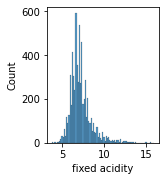

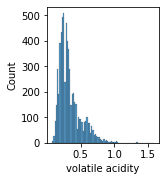

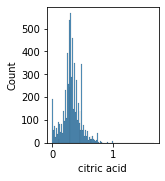

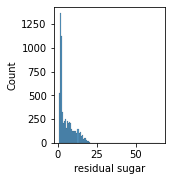

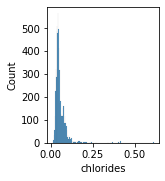

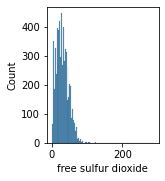

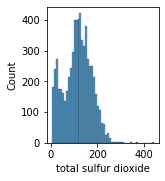

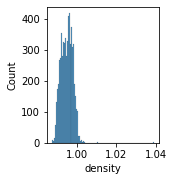

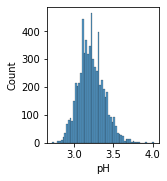

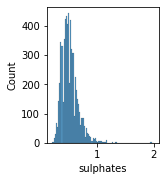

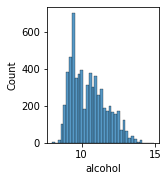

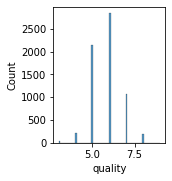

In [ ]:
colunas = df_features.columns

for i in colunas:
    plt.figure(figsize=(2, 2.5))
    fig = sns.histplot(data= df_features,x = df_features[i])
    


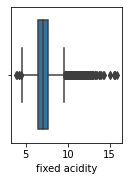

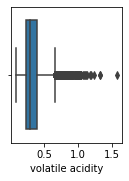

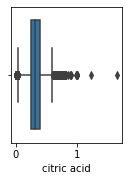

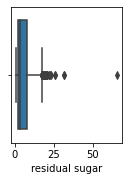

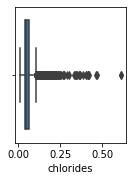

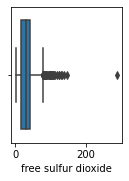

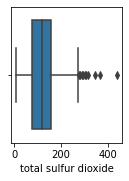

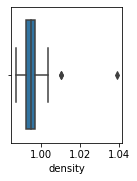

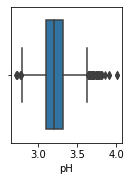

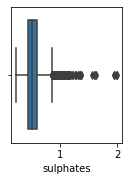

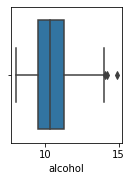

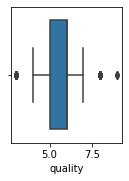

In [ ]:
for i in colunas:
    plt.figure(figsize=(2,2.5))   
    fig = sns.boxplot(data= df_features,x = df_features[i])

##Manual Feature selection##


A Seleção de *features* pode ser realizada por meio da análise de correlação entre as *features*, no entanto é inconclusiva, outros testes estatísticos devem ser aplicados para indicação de causalidade. 

In [ ]:
#remove features com baixa correlação
df_selected_red = df.drop(columns = ['quality'])

df_selected_quality = df.drop(columns = ['wine_is_red'])


In [ ]:

#Separa em dataset features e labels para vinhos tintos e brancos
features_red = df_selected_red.drop(columns = ['wine_is_red'])

labels_red = df_selected_red['wine_is_red']

#Separa em dataset features e labels para qualidade
features_quality = df_selected_quality.drop(columns = ['quality'])

labels_quality = df_selected_quality['quality']

##Pipelines## 

In [ ]:
#separa o data set em treino e teste para o problema de classificação (tinto ou branco)
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(features_red, labels_red, test_size = 0.35, random_state = 10
                                                                    )

#separa o data set em treino e teste para o problema de classificação (qualidade)
x_train, x_test, y_train, y_test = train_test_split(features_quality, labels_quality, test_size = 0.35, random_state = 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#implementa os tratamentos de dados, normaliza e testa o modelo por meio de um pipeline da biblioteca sklearn
#RandomForest
pipe = Pipeline([('scaler', StandardScaler()),
                 ('forest', RandomForestClassifier()),])


pipe.fit(x_red_train,y_red_train)
pipe_viz = pipe.score(x_red_test,y_red_test)

display(pipe_viz)

#KNN
pipe2 = Pipeline([('scaler', StandardScaler()),
                  ('KNN', KNeighborsClassifier(n_neighbors= 5)),])

pipe2.fit(x_red_train,y_red_train)
pipe2_viz = pipe2.score(x_red_test,y_red_test)

display(pipe2_viz)

#Gaussian Naive-Bayes
pipe3 = Pipeline([('scaler', StandardScaler()),
                  ('Gauss', GaussianNB()),])

pipe3.fit(x_red_train,y_red_train)
pipe3_viz = pipe3.score(x_red_test,y_red_test)

display(pipe3_viz)


0.992305324715297

0.9932286857494613

0.9756848261003386

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#implementa os tratamentos de dados, normaliza e testa o modelo por meio de um pipeline da biblioteca sklearn
#RandomForest
pipe = Pipeline([('scaler', StandardScaler()),
                 ('forest', RandomForestClassifier(n_estimators= 1000)),])


pipe.fit(x_train,y_train)
pipe_viz = pipe.score(x_test,y_test)

display(pipe_viz)

#KNN
pipe2 = Pipeline([('scaler', StandardScaler()),
                  ('KNN', KNeighborsClassifier(n_neighbors= 5)),])

pipe2.fit(x_train,y_train)
pipe2_viz = pipe2.score(x_test,y_test)

display(pipe2_viz)

#Gaussian Naive-Bayes
pipe3 = Pipeline([('scaler', StandardScaler()),
                  ('SVC', SVC(gamma='auto')),])

pipe3.fit(x_train,y_train)
pipe3_viz = pipe3.score(x_test,y_test)

display(pipe3_viz)

pred =  pipe.predict(x_test)

print(y_test[1:100])
print(pred[1:100])

NameError: ignored